In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import pandas as pd
from gettingsegments import extract_segments, plot_signal
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [28]:
current_dir = os.getcwd()
os.chdir('c:\\Users\\Melanie\\OneDrive - Rensselaer Polytechnic Institute\\Desktop\\School\\24_Spring\\MLE\\Project\\data')

electrode_locations = {"FP1": 0, "FP2": 1, "FC5": 2, "FC6": 3, "FZ": 4,
                        "T7": 5, "CZ": 6, "T8": 7, "P7": 8, "P3": 9, "PZ": 10,
                          "P4": 11, "P8": 12, "O1": 13, "Oz": 14, "O2": 15}

files = os.listdir()
#getting the demographics both gets rid of that column and imports it 
demographics = pd.read_csv(files.pop(0),names=["Isman","Age","Fatigue"])
n = np.shape(demographics)[0]

In [29]:
indices = list(range(10))
def split_data(i, X, y):
    training_set = indices[:i] + indices[i+1:]
    X_train, y_train = X[training_set], np.matrix(y[training_set]).T
    X_test, y_test = X[i], np.matrix(y[i])
    
    #reshape X_test to also be a 3D matrix like how X_train is
    X_test = X_test.reshape(1, np.shape(X_test)[0], np.shape(X_test)[1])
    return X_train, y_train, X_test, y_test

In [37]:
def make_model(inputshape):
    model = Sequential()
    #the layers
    kernal_size = 10
    model.add(Conv1D(filters=64, #this is the number of filters
                    kernel_size=kernal_size,
                    #set the activation function
                    activation='relu', 
                    input_shape = inputshape))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=16, 
                    kernel_size=kernal_size,
                    activation='relu'))

    #flatten out and make the rest of it
    model.add(Flatten())
    model.add(Dense(256, #number of units
                    activation='relu'))
    model.add(Dense(128, #number of units
                    activation='relu'))
    model.add(Dense(64, #number of units
                    activation='relu'))
    model.add(Dense(1, #64 neurons
                    activation='sigmoid')) #maybe u can try tanh
    #compiler
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # # Print model summary
    # model.summary()
    return model


In [50]:
def get_model_output(file_value):
    y_predicted = np.zeros(10)
    #get the file
    t, signal, section_num, class_bool, p_num = extract_segments(files[file_value])
    for i in range(10):
        #run pca to reduce the dimensionality of the data (whiten to make it N(0,1))
        pca = PCA(whiten = True, n_components = 0.99) #99% seems to be a standard
        new_signal = pca.fit_transform(signal.T).T

        #do some data reshaping and management and splitting
        segments = new_signal.T.reshape((10,5121,np.shape(new_signal)[0]))
        y_segments = class_bool.reshape((10, 5121)).T[0]
        y_segments[y_segments == 2] = 0 #get 0s and 1s instead of 1s and 2s
        X_train, y_train, X_test, y_test = split_data(i, segments, y_segments)

        #train the model
        model = make_model(np.shape(segments)[1:])
        history = model.fit(X_train, y_train, 
                            epochs=10, 
                            batch_size=32, 
                            validation_split=0.3,
                            verbose = 0)
        y_predicted[i] = round(model.predict(X_test, batch_size=32)[0][0])

    accuracy = (10 - np.count_nonzero(y_predicted - y_segments))/10
    return y_predicted, y_segments

In [48]:
def get_model_metrics(y_predicted, y_segments, i):
    accuracy = (10 - np.count_nonzero(y_predicted - y_segments))/10
    fig, ax = plt.subplots(figsize=(3,2))
    disp = heatmap(confusion_matrix(y_segments, y_predicted),
               annot = True)
    disp.set_title("Participant {}, acc = {:.2f}".format(i, accuracy))
    plt.show()

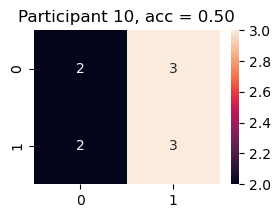

In [49]:
fig, ax = plt.subplots(figsize=(3,2))
disp = heatmap(confusion_matrix(y_segments, y_predicted),
            annot = True)
disp.set_title("Participant {}, acc = {:.2f}".format(i, accuracy))
plt.show()

In [ ]:
accuracies = [0.3, 0.8, 0.5,0.3,0.3,0.9,np.nan,0.6,0.7,0.7, 
              0.8, 0.6, 0.5,, 0.7]

In [52]:
for i in range(len(files)):
    print(i)
    y_predicted, y_segments = get_model_output(i)
    print(y_predicted)
    print(y_segments)
    get_model_metrics(y_predicted, y_segments, i)

20


IndexError: list index out of range

In [34]:
accuracies = [0.3, 0.8, 0.5, 0.3, 0.3,  0.9,np.nan,0.6,0.7,0.7, 
              0.8, 0.6, 0.5, 0.7, 0.4,  0.8,0.7   ,0.7,0.8,] #i just typed them cuz i couldn't be
#bothered to figure out how to save the confusion matrixes :skull:, I promise my results are legit